In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import PowerTransformer

In [173]:
data=pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


EDA

In [174]:
data.describe()# statistical summary of the dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [175]:
data.info()# data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [176]:
data.isnull().sum()#checking for null values 

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [177]:
null_emp_length_entries = data[data['person_emp_length'].isnull()]
null_emp_length_entries

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [178]:
loan_int_rate = data[data['loan_int_rate'].isnull()]
loan_int_rate  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [179]:
unique_names = data['cb_person_default_on_file'].unique()
print("Unique names: ", unique_names)

Unique names:  ['Y' 'N']


In [180]:
data['person_home_ownership'] = data['person_home_ownership'].replace({'RENT': 1, 'MORTGAGE': 2, 'OWN':3,'OTHER':4})
data['loan_intent'] = data['loan_intent'].replace({'PERSONAL':1, 'EDUCATION':2, 'MEDICAL':3, 'VENTURE':4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION':6})
data['loan_grade'] = data['loan_grade'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6,'G':7})
data['cb_person_default_on_file']=data['cb_person_default_on_file'].replace({'Y':1,'N':2})

/tmp/ipykernel_47/3597514653.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['person_home_ownership'] = data['person_home_ownership'].replace({'RENT': 1, 'MORTGAGE': 2, 'OWN':3,'OTHER':4})
/tmp/ipykernel_47/3597514653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_intent'] = data['loan_intent'].replace({'PERSONAL':1, 'EDUCATION':2, 'MEDICAL':3, 'VENTURE':4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION':6})
/tmp/ipykernel_47/3597514653.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [181]:
# Imputing missing values with median
data=data.fillna(data.mean())#median())

In [182]:
# Imputing missing values with mean
data['person_emp_length'].fillna(data['person_emp_length'].median())#mean())
data['loan_int_rate'].fillna(data['loan_int_rate'].median())#mean())

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [183]:
data.isnull().sum()#checking for null values after imputation

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [184]:
max_age = data['person_age'].max()
min_age = data['person_age'].min()
print(f"maximum Age {max_age}")
print(f"minimum Age {min_age}")


maximum Age 144
minimum Age 20


In [185]:
max_income = data['person_income'].max()
min_income = data['person_income'].min()

print(f"maximum Income {max_income}")
print(f"minimum Income {min_income}")

maximum Income 6000000
minimum Income 4000


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_home_ownership'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_intent'}>,
        <Axes: title={'center': 'loan_grade'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_default_on_file'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>]],
      dtype=object)

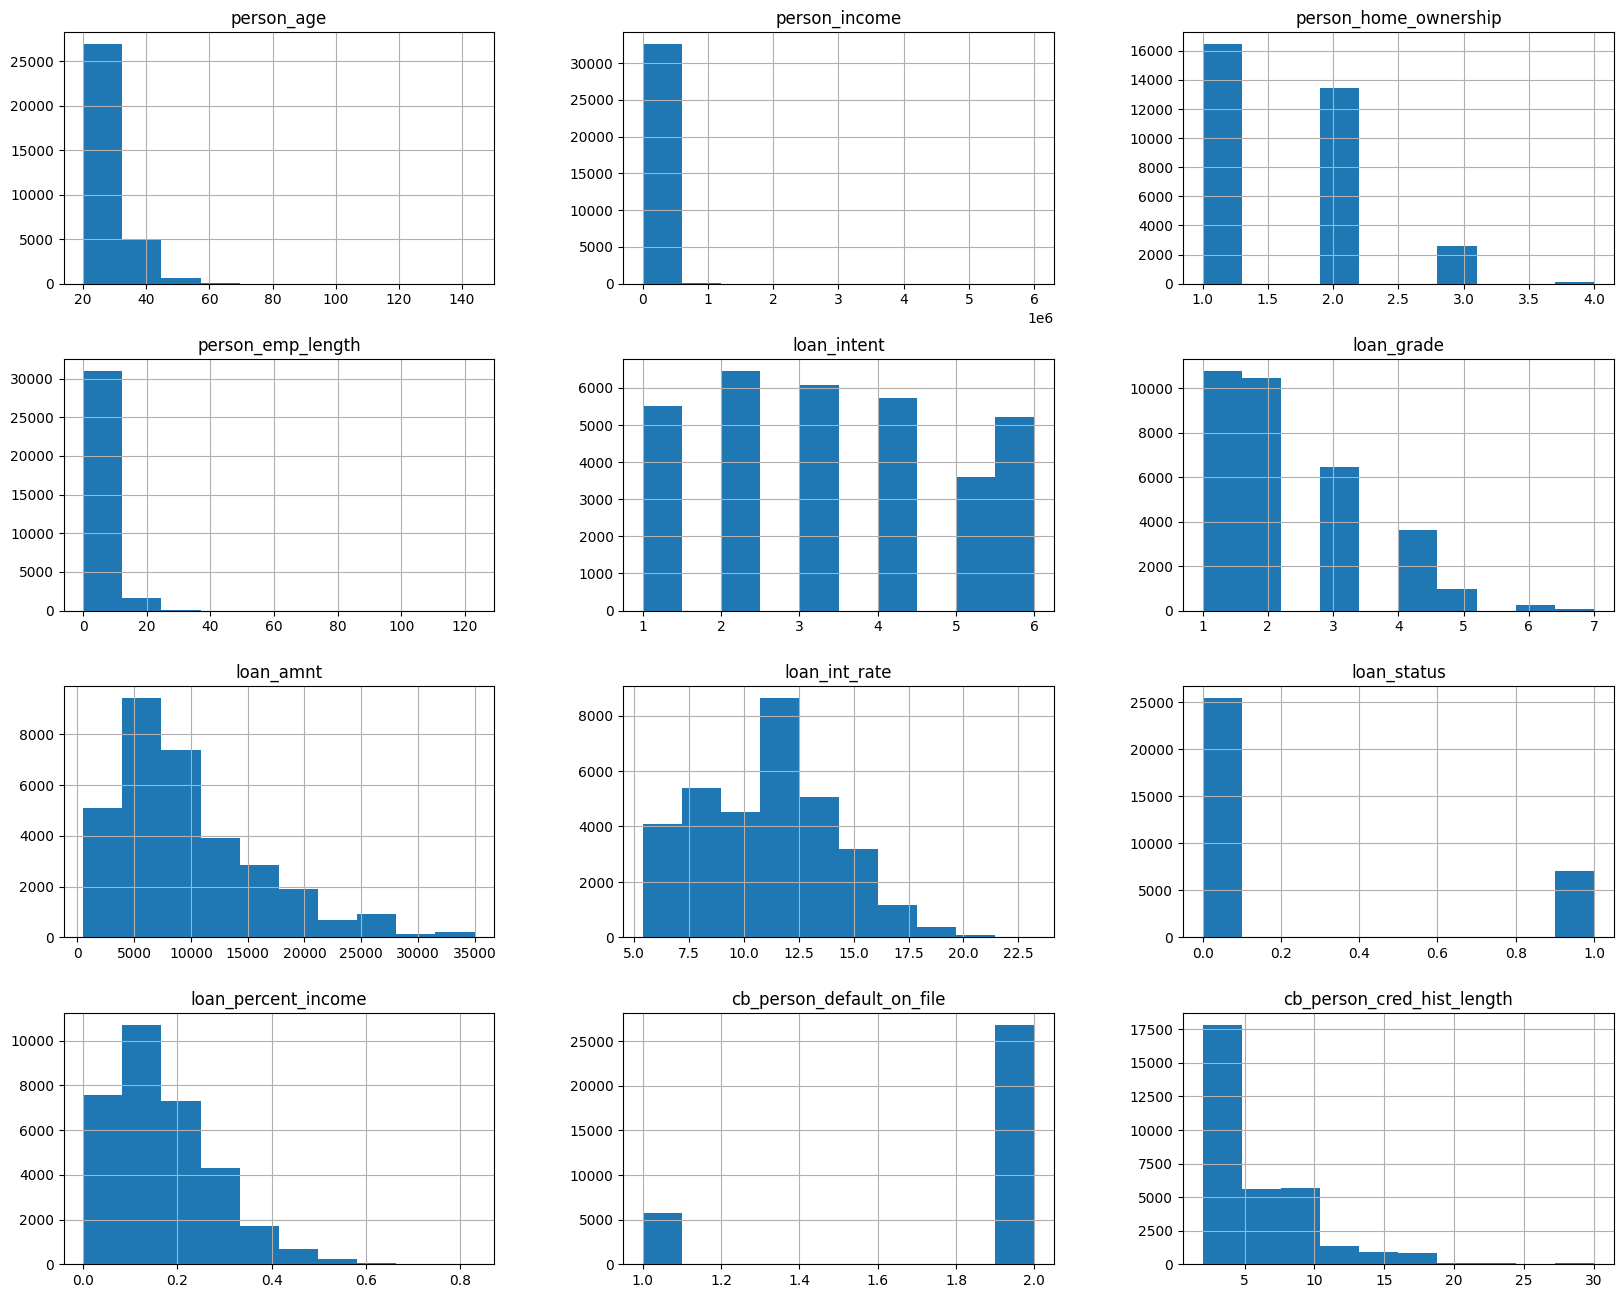

In [186]:
data.hist(figsize=(20, 16))

In [187]:
skew_vals=data.skew()
skew_vals

person_age                     2.581393
person_income                 32.865349
person_home_ownership          0.746013
person_emp_length              2.651118
loan_intent                    0.193253
loan_grade                     0.866563
loan_amnt                      1.192477
loan_int_rate                  0.219300
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_default_on_file     -1.698687
cb_person_cred_hist_length     1.661790
dtype: float64

In [ ]:
# Separate columns by skewness level
high_skew = skew_vals[skew_vals.abs() > 2].index
moderate_skew = skew_vals[(skew_vals.abs() > 0.5) & (skew_vals.abs() <= 2)].index

print("Highly skewed columns:", list(high_skew))
print("Moderately skewed columns:", list(moderate_skew))

# --- Transformations ---
# Highly skewed: log1p only for positive values
for col in high_skew:
    if (data[col] >= 0).all():   
        data[col] = np.log1p(data[col])
    else:
        # for negatives 
        pt = PowerTransformer(method='yeo-johnson')
        data[col] = pt.fit_transform(data[[col]])

# Moderately skewed: square root only for non-negative values
for col in moderate_skew:
    if (data[col] >= 0).all():
        data[col] = np.sqrt(data[col])
    else:
        # Yeo-Johnson again for negatives
        pt = PowerTransformer(method='yeo-johnson')
        data[col] = pt.fit_transform(data[[col]])

Highly skewed columns: ['person_age', 'person_income', 'person_emp_length']
Moderately skewed columns: ['person_home_ownership', 'loan_grade', 'loan_amnt', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [189]:
data.skew()

person_age                    1.241667
person_income                 0.155994
person_home_ownership         0.481535
person_emp_length            -0.485497
loan_intent                   0.193253
loan_grade                    0.404344
loan_amnt                     0.417025
loan_int_rate                 0.219300
loan_status                   1.364888
loan_percent_income           0.290953
cb_person_default_on_file    -1.698687
cb_person_cred_hist_length    0.896274
dtype: float64

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_home_ownership'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_intent'}>,
        <Axes: title={'center': 'loan_grade'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_default_on_file'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>]],
      dtype=object)

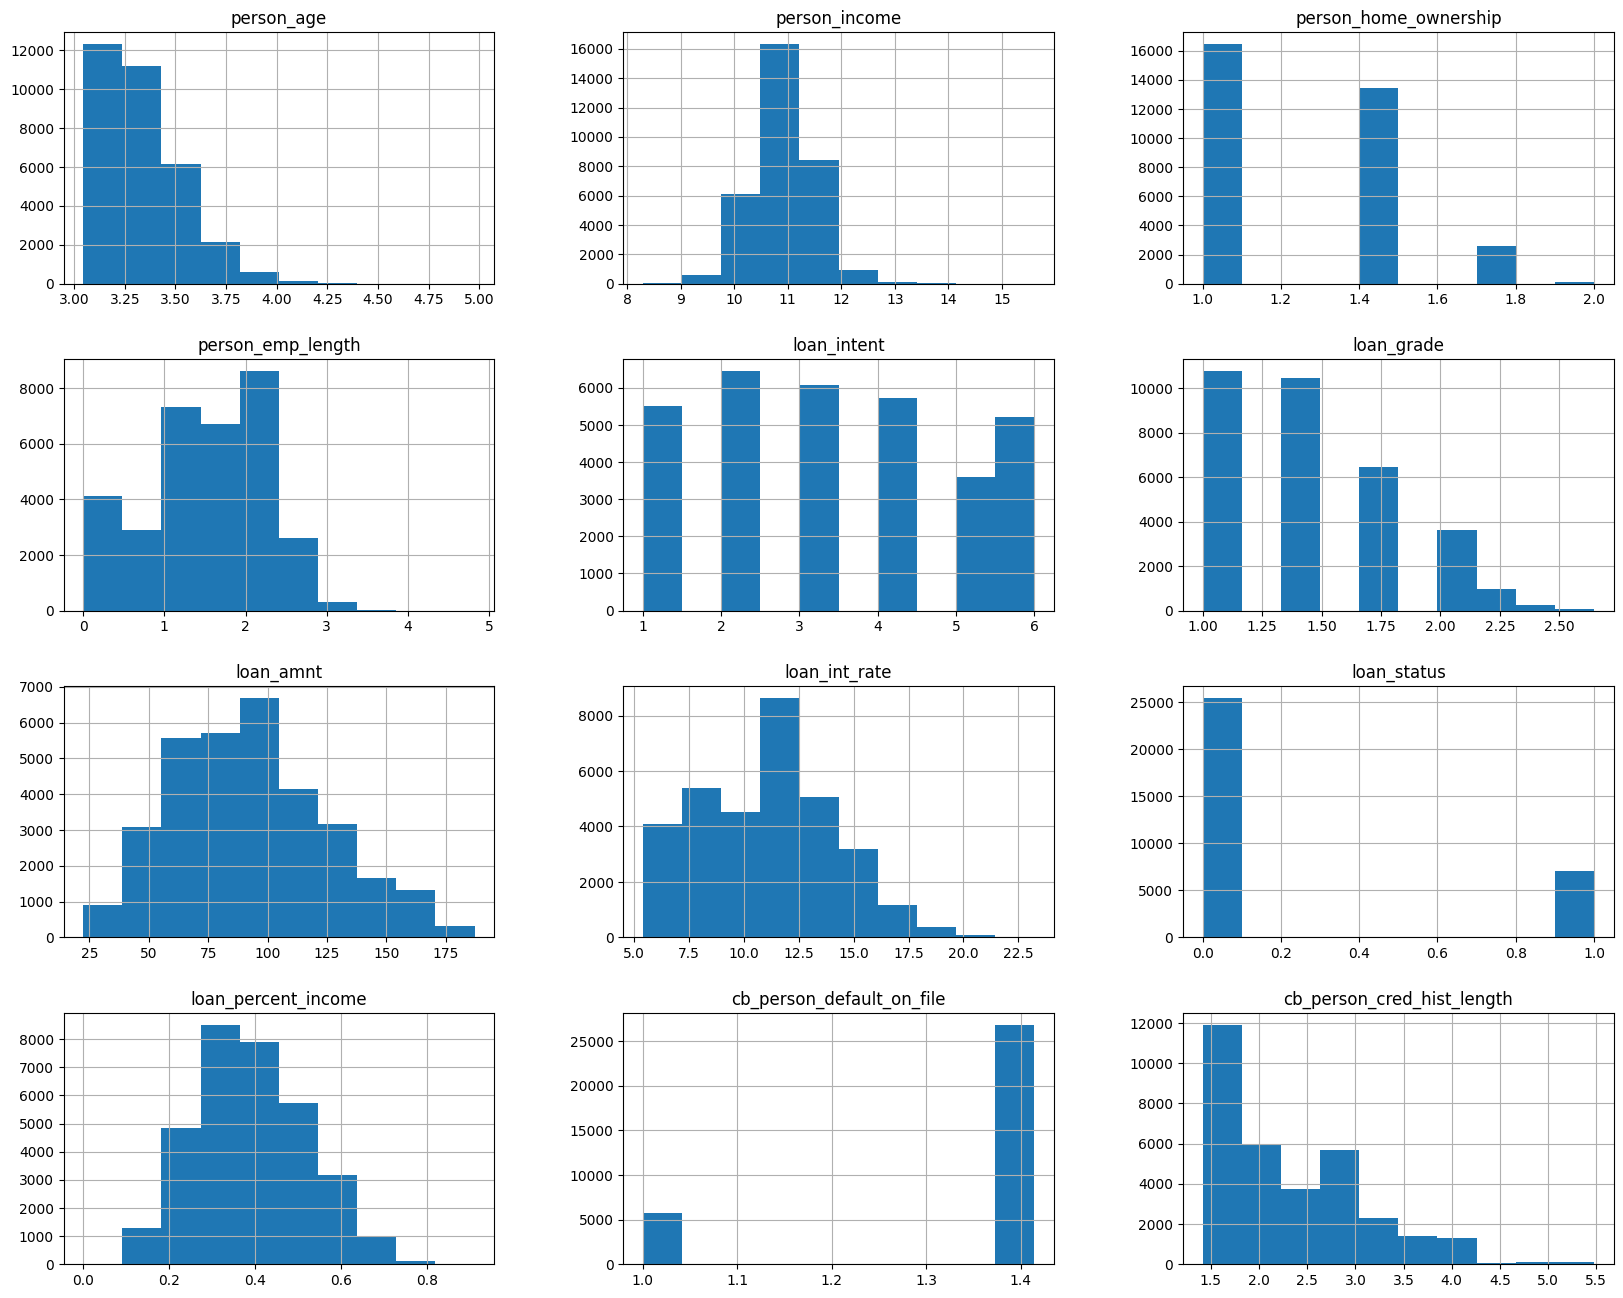

In [190]:
data.hist(figsize=(20,16))

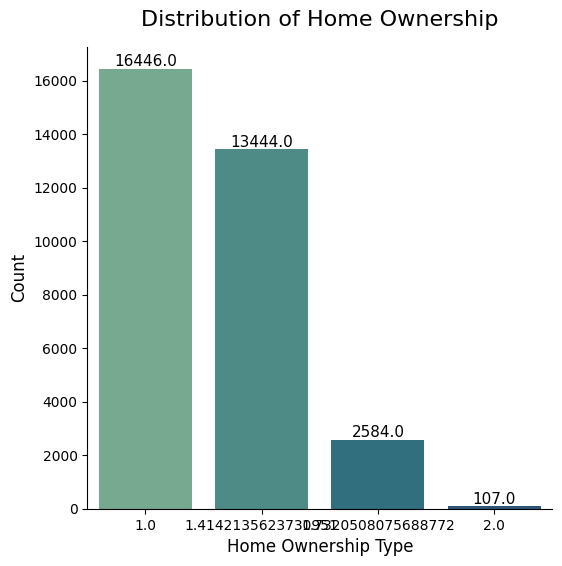

In [191]:
# Visualizing the distribution of home ownership types
custom_palette = sns.color_palette("crest", n_colors=data["person_home_ownership"].nunique())

plt.figure(figsize=(6,6))

ax = sns.countplot(
    x="person_home_ownership",
    data=data,
    palette=custom_palette,
    order=data["person_home_ownership"].value_counts().index
)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')


ax.set_title("Distribution of Home Ownership", fontsize=16, pad=15)
ax.set_xlabel("Home Ownership Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
sns.despine()

plt.show()

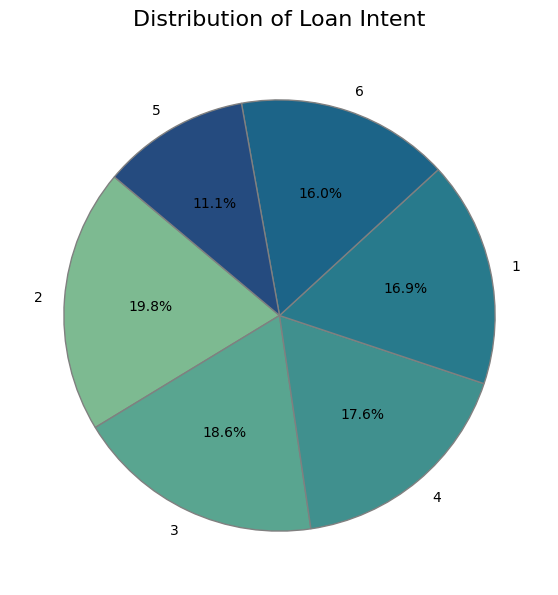

In [192]:
# Visualizing the distribution of loan intent
loan_counts = data["loan_intent"].value_counts()


colors = sns.color_palette("crest", n_colors=len(loan_counts))


plt.figure(figsize=(7,7))
plt.pie(
    loan_counts.values,
    labels=loan_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'gray', 'linewidth':1})

plt.title("Distribution of Loan Intent", fontsize=16, pad=15)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


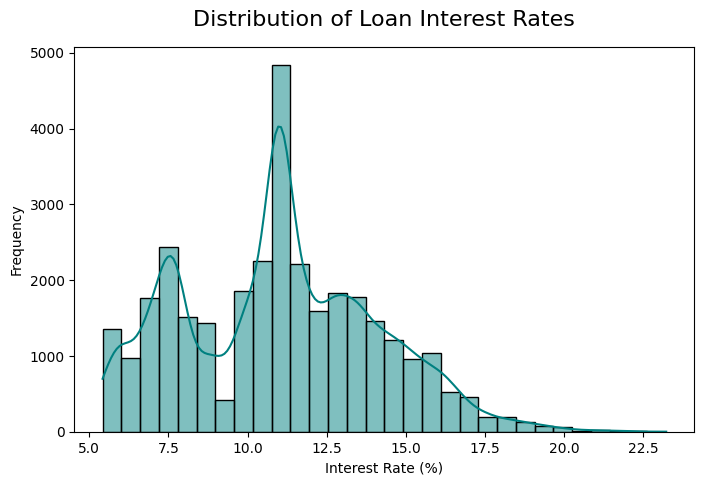

In [193]:
# Visualizing the distribution of loan interest rates
plt.figure(figsize=(8,5))
sns.histplot(data["loan_int_rate"], kde=True, color="teal", bins=30)
plt.title("Distribution of Loan Interest Rates", fontsize=16, pad=15)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Logistic Regression


In [194]:
# Dataset splitting
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)
for train_index, test_index in split_data.split(data, data['loan_status']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [195]:
print(train_set.shape, test_set.shape)
print(train_set['loan_status'].value_counts())
print(test_set['loan_status'].value_counts())

(26064, 12) (6517, 12)
loan_status
0.0    20378
1.0     5686
Name: count, dtype: int64
loan_status
0.0    5095
1.0    1422
Name: count, dtype: int64


In [196]:
#splitting features and target variable for train set data
Ftrs_train = train_set.drop(columns='loan_status', axis=1)
Trgt_train = train_set['loan_status']

#splitting for test set data
Ftrs_test = test_set.drop(columns='loan_status', axis=1)
Trgt_test = test_set['loan_status']
#checking the split
print(Ftrs_train.shape, Trgt_train.shape)
print(Ftrs_test.shape, Trgt_test.shape)

(26064, 11) (26064,)
(6517, 11) (6517,)


In [197]:
# X_train: Training features, y_train: Training target labels
model = LogisticRegression()
model.fit(Ftrs_train, Trgt_train)
Trgt_pred = model.predict(Ftrs_train)
accuracy = accuracy_score(Trgt_train,Trgt_pred)
print("Accuracy score on train set:", accuracy)
Trgt_pred = model.predict(Ftrs_test) #predicting on test set for evaluation
accuracy = accuracy_score(Trgt_test,Trgt_pred)
print("Accuracy score on test set:", accuracy)

Accuracy score on train set: 0.8449969306322898
Accuracy score on test set: 0.8450207150529385


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [198]:
print("Confuion matrix\n",confusion_matrix(Trgt_test,Trgt_pred))
print("\nClassification report\n",classification_report(Trgt_test,Trgt_pred))

Confuion matrix
 [[4820  275]
 [ 735  687]]

Classification report
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5095
         1.0       0.71      0.48      0.58      1422

    accuracy                           0.85      6517
   macro avg       0.79      0.71      0.74      6517
weighted avg       0.83      0.85      0.83      6517

